In [177]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns  #for making statistical graphics
from matplotlib import pyplot as plt

In [162]:
# create dataframe from .xlsx
consoleSales = pd.read_excel('../DataSource/2 Console_sales.xlsx')
consoleSales.head()

,Year,Dato,Console,Company,Sales
0,2011,anual,Nintendo 3DS,Nintendo,12560000.0
1,2012,anual,Nintendo 3DS,Nintendo,13480000.0
2,2013,anual,Nintendo 3DS,Nintendo,14310000.0
3,2014,anual,Nintendo 3DS,Nintendo,9740000.0
4,2015,anual,Nintendo 3DS,Nintendo,7330000.0


In [163]:
consoleSales.tail()

,Year,Dato,Console,Company,Sales
79,2014,anual,Xbox360,Microsoft,2600000.0
80,2015,anual,Xbox360,Microsoft,930000.0
81,2016,anual,Xbox360,Microsoft,390000.0
82,2017,anual,Xbox360,Microsoft,60000.0
83,2018,Out_of_use,Xbox360,Microsoft,-69910000.0


In [164]:
consoleSales.info()  # general info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     84 non-null     int64  
 1   Dato     84 non-null     object 
 2   Console  84 non-null     object 
 3   Company  84 non-null     object 
 4   Sales    84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB


In [165]:
consoleSales[consoleSales['Dato'] == 'Out_of_use']

,Year,Dato,Console,Company,Sales
14,2014,Out_of_use,Nintendo DS,Nintendo,-89890000.0
25,2016,Out_of_use,Nintendo Wii,Nintendo,-81510000.0
32,2018,Out_of_use,Nintendo Wii U,Nintendo,-13630000.0
41,2018,Out_of_use,Sony PS Vita,Sony,-15530000.0
52,2018,Out_of_use,Sony PS3,Sony,-77730000.0
66,2015,Out_of_use,Sony PSP,Sony,-48290000.0
83,2018,Out_of_use,Xbox360,Microsoft,-69910000.0


In [166]:
for console in consoleSales['Console'].unique(): print(console)    # these are the console names

Nintendo 3DS
Nintendo DS
Nintendo Switch
Nintendo Wii
Nintendo Wii U
Sony PS Vita
Sony PS3
Sony PS4
Sony PSP
Xbox One
Xbox360


In [167]:
for company in consoleSales['Company'].unique(): print(company)    # these are Company names

Nintendo
Sony
Microsoft


In [168]:
# Are there any null values in any of the columns? NO
print(f'{consoleSales.isnull().all(1).sum()} columns with null values')

0 columns with null values


In [169]:
# There are not rows with all null values
print(f'{consoleSales.isnull().all(1).sum()} rows with null values')

0 rows with null values


In [170]:
consoleSales.isna().sum(0)        # counting missing values for each column.

Year       0
Dato       0
Console    0
Company    0
Sales      0
dtype: int64

In [171]:
for dato in consoleSales['Dato'].unique(): print(dato)    # These are the distinct values in Dato column

anual
Out_of_use


In [172]:
print(f'There are {consoleSales["Sales"][np.mod(consoleSales["Sales"], 1) > 0].count()} decimals on Sales')

There are 2 decimals on Sales


In [173]:
# Redondear las filas con parte decimal mayor a cero en la columna 'Sales'
df_filtrado = consoleSales['Sales'].apply(lambda x: round(x, 0) if x % 1 > 0 else x)

for i in range(2):
    print(f'{consoleSales["Sales"].loc[70 + i]} rounded to {df_filtrado[70 + i]}')

consoleSales['Sales'] = df_filtrado
print(f'There are {consoleSales["Sales"][np.mod(consoleSales["Sales"], 1) > 0].count()} decimals on Sales')

8369999.999999999 rounded to 8370000.0
8210000.000000001 rounded to 8210000.0
There are 0 decimals on Sales


In [174]:
consoleSales['Sales'] = consoleSales['Sales'].apply(int)
consoleSales['Sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84 entries, 0 to 83
Series name: Sales
Non-Null Count  Dtype
--------------  -----
84 non-null     int64
dtypes: int64(1)
memory usage: 800.0 bytes


In [175]:
# 'Out of use' is a totalization field that we can remove
withoutOutOfUse = consoleSales[(consoleSales['Dato'] != 'Out_of_use')]
print(f'Rows before  = {len(consoleSales)}\nRows after   = {len(withoutOutOfUse)}')
print(f'Deleted rows =  {len(consoleSales) - len(withoutOutOfUse)}')

Rows before  = 84
Rows after   = 77
Deleted rows =  7


<AxesSubplot:>

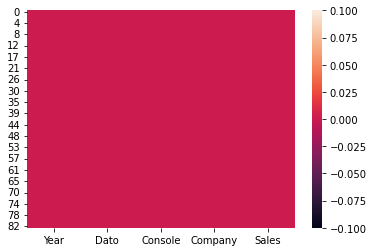

In [178]:
# heatmap showing missing values: all OK
sns.heatmap(withoutOutOfUse.isna())

In [176]:
# Let's persist the data in a .csv file with columns separated by ';'
withoutOutOfUse.to_csv('../DataClean/Console_sales_chewed.csv', sep=';', index=False)